<h1 style="color:orange">ANALYZING EFFECTS OF POLE POSITION ON THE RACE RESULTS</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
results_df = pd.read_csv('datasets/cleaned/race_results.csv')
results_df.info()
results_df.head()
races_df = pd.read_csv('datasets/cleaned/races.csv')
circuits_df = pd.read_csv('datasets/original/circuits.csv')
set.difference(set([i for i in range(1,1087)])),set(results_df['raceId'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           25660 non-null  int64  
 1   driverId         25660 non-null  int64  
 2   constructorId    25660 non-null  int64  
 3   grid             25660 non-null  int64  
 4   positionOrder    25660 non-null  int64  
 5   points           25660 non-null  float64
 6   laps             25660 non-null  int64  
 7   time             25660 non-null  object 
 8   milliseconds     25660 non-null  float64
 9   fastestLap       25660 non-null  float64
 10  rank             25660 non-null  float64
 11  fastestLapTime   25660 non-null  object 
 12  fastestLapSpeed  25660 non-null  float64
 13  statusId         25660 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.7+ MB


({1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

<h4 style="color:LavenderBlush">Creating dataframe for every race on every circuit</h4>

In [3]:
results_df['positionOrder'].describe()
# finished_df = results_df[results_df['statusId'] == 1]
pole_df = results_df[results_df['grid'] == 1] # this gets all the winners
# finished_df.rename(columns={'grid':'startingPos','positionOrder':'finishPos'},)
races_df.head()
# finished_df.set_index('raceId').join(races_df.set_index('raceId'))
pole_circuit_df = pd.merge(pole_df,races_df,on='raceId')
pole_circuit_df = pd.merge(pole_circuit_df,circuits_df,on='circuitId')

In [4]:
# finished_circuit_df.drop(columns={'location','country', 'lat', 'lng','alt','round','name_y','date','url','circuitRef','time','points','laps','statusId'},inplace=True)
pole_circuit_df.head()
pole_results_df = pole_circuit_df[['raceId','driverId','circuitId','name_x','grid','positionOrder']]


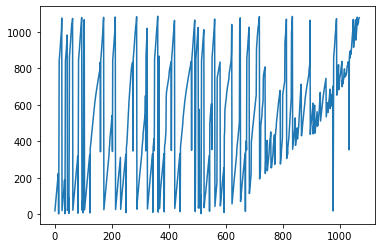

In [5]:
plt.plot(pole_results_df['raceId'].unique())

<h3 style="color:ForestGreen">Analysis of Pole-win Ratio</h3>

In [6]:
import operator
def pwrfor(groupId,relate,position):
    per_group_df = pole_results_df.groupby(groupId)
    group_poles = per_group_df.size()
    per_group_winner_df = pole_results_df[relate(pole_results_df['positionOrder'],position)].groupby(groupId)
    group_wins_poles = per_group_winner_df.size()
    group_pole_win_ratio = group_wins_poles/group_poles
    group_pole_win_ratio.index
    top20_df = group_pole_win_ratio.sort_values(ascending=False).head(20)
    bottom20_df = group_pole_win_ratio.sort_values().head(20)
    plt.bar(group_pole_win_ratio.index,group_pole_win_ratio)
    plt.title(f'Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    plt.bar(top20_df.index,top20_df)
    plt.title(f'Top 20 Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    plt.bar(bottom20_df.index,bottom20_df)
    plt.title(f'Bottom 20 Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    


<h3 style="color:orange">Pole-Win Ratio per Circuit and Driver</h3>

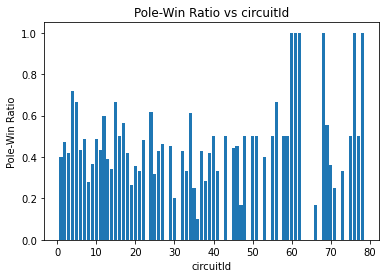

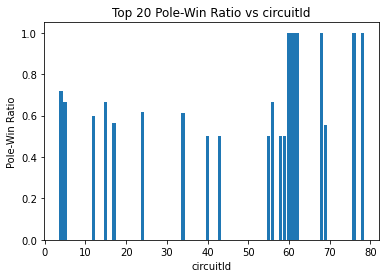

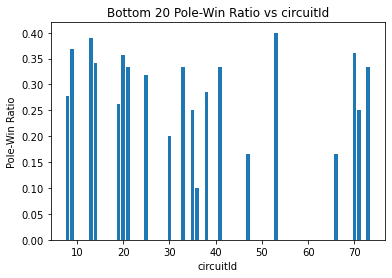

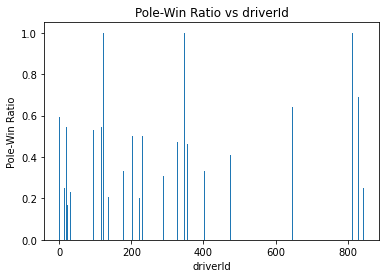

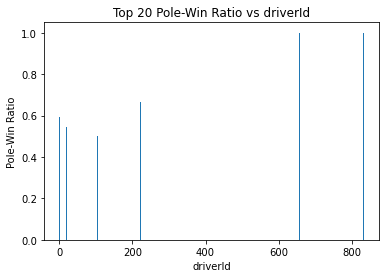

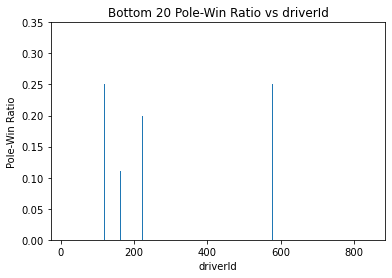

In [7]:
pwrfor('circuitId',operator.eq,1)
pwrfor('driverId',operator.eq,1)

<h3 style="color:orange">Pole-Top10 Ratio per Circuit and Driver</h3>

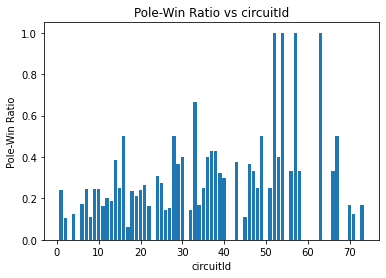

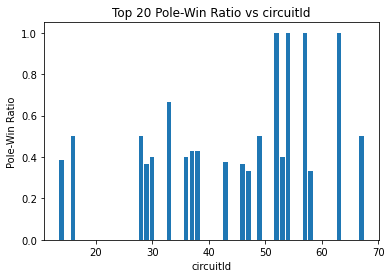

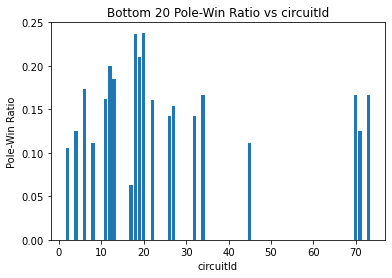

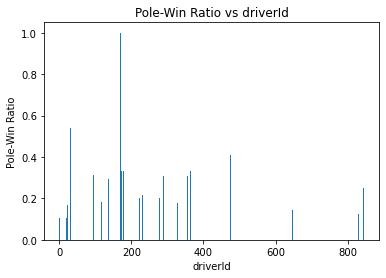

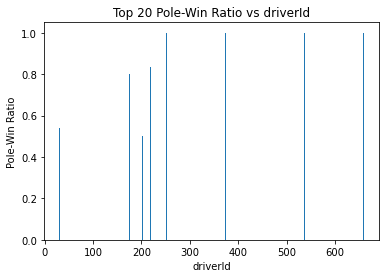

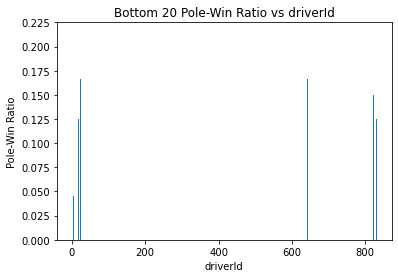

In [8]:
pwrfor('circuitId',operator.gt,11)
pwrfor('driverId',operator.gt,11)

<h3 style="color:red">Driver and Circuit</h3>

In [9]:
drivers_df = pd.read_csv('datasets/cleaned/drivers.csv')

res = pole_circuit_df[['driverId','circuitId','grid','positionOrder']]
res.rename(columns = {'driverId':"A",'circuitId':'B'},inplace=True)
res = res.groupby(['A','B']).apply(lambda dc :dc[dc['positionOrder']==1].size/dc.size)
dc_matrix = res.unstack(level=1).fillna(0)
dc_matrix['A']= dc_matrix.index
dc_matrix = dc_matrix.melt(id_vars="A",
        var_name="B", 
        value_name="value")
greatest_drivers = [0,29,19,116,101,3,49,94,327,181]
gd_df = dc_matrix[dc_matrix['A'].isin(greatest_drivers)]
greatest_circuits = [13,5,8,12,6,17,10,69,21,38]
gd_df = gd_df[gd_df['B']<200]
gd_df


c:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,A,B,value
2,3,1,0.0
19,49,1,0.0
112,3,2,0.0
129,49,2,0.0
222,3,3,0.0
...,...,...,...
8049,49,77,0.0
8142,3,78,0.0
8159,49,78,0.0
8252,3,79,0.0


<h4 style="color:#00fa9a">Greatest Drivers</h4>

In [10]:
d_df = drivers_df.iloc[greatest_drivers]['name'].sort_values().reset_index(level=0)
d_df.rename(columns={'index':'driverId','name':'dname'},inplace=True)
print(d_df.to_string())


   driverId               dname
0       116         Alain Prost
1       101        Ayrton Senna
2         3     Fernando Alonso
3       327      Jackie Stewart
4        49      Jos Verstappen
5         0      Lewis Hamilton
6        29  Michael Schumacher
7        94       Nigel Mansell
8       181          Niki Lauda
9        19    Sebastian Vettel


<h4 style="color:#00fa9a">Greatest Circuits</h4>

In [11]:
gc_df = circuits_df.iloc[greatest_circuits]['name'].sort_values().reset_index(level=0)
gc_df.rename(columns={'index':'circuitId','name':'cname'},inplace=True)
print(gc_df.to_string())

   circuitId                         cname
0         13  Autodromo Nazionale di Monza
1         17    Autódromo José Carlos Pace
2          6     Circuit Gilles Villeneuve
3          5             Circuit de Monaco
4         12  Circuit de Spa-Francorchamps
5         10                   Hungaroring
6          8           Silverstone Circuit
7         69                Sochi Autodrom
8         21                Suzuka Circuit
9         38                        Zolder


                A       value
count  152.000000  152.000000
mean    26.000000    0.058114
std     23.076033    0.212954
min      3.000000    0.000000
25%      3.000000    0.000000
50%     26.000000    0.000000
75%     49.000000    0.000000
max     49.000000    1.000000


<AxesSubplot:xlabel='B', ylabel='A'>

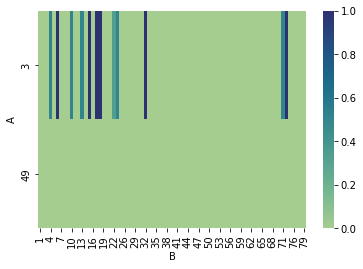

In [12]:
print(gd_df.describe())
sb.heatmap(gd_df.pivot(index='A',columns='B',values='value'),cmap='crest')